# NFL Salary Cap Optimizer by Position

Background: In an effort to broaden its audience, the NFL is expanding its roster from 32 teams to 34 teams with two new franchises to be located in London, UK and Vancouver, CA. We have been approached by the ownership group from one of the cities and they are eager to establish themselves as serious contenders to maximize public interest and in turn, revenue.

Problem: The ownership group has asked us how their team can best maximize win percentage during the regular season (17 games)  by looking at how to best allocate their available "Salary Cap" (league imposed spending limit on players).

Goals: Use historic nfl data to predict a team's regular season win percentage given how much they spend on diffent player position groups and provide recomendations on how they should best spend their salary cap.

Methodology: Scrape historic nfl player contract data and team win percentage data from the internet. 

In [ ]:
# comments datta understanding markdown


## 1) Imports

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, accuracy_score, make_scorer, recall_score, plot_roc_curve, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

%matplotlib inline

#For Scraping
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait 
import time
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import csv
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

!pip install html5lib
import html5lib

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.pipeline import Pipeline

### Possibly use later for win% df scrape

team_data_2021 = pd.read_html("https://www.spotrac.com/nfl//cap/2021/")

team_data_2021 = pd.DataFrame(team_data_2021[0])

team_data_2020 = pd.read_html("https://www.spotrac.com/nfl//cap/2020/")

team_data_2020 = pd.DataFrame(team_data_2020[0])

team_data_2019 = pd.read_html("https://www.spotrac.com/nfl//cap/2019/")

team_data_2019 = pd.DataFrame(team_data_2019[0])

team_data_2021['Team'] = team_data_2021['Team'].astype(str)
team_data_2021.info()

# 2)Scraping

Created the following lists in excel by using filtering unique values, CONCAT() and find & replace.
Done in excel for speed, but will revisit in python when time allows

In [3]:
# Find and replace " " with "-" to align with website naming convention
# Not currently used but may use later for scraping

html_team_list = ["Jacksonville-Jaguars",
"Los-Angeles-Chargers",
"Philadelphia-Eagles",
"Denver-Broncos",
"Seattle-Seahawks",
"Pittsburgh-Steelers",
"Cleveland-Browns",
"Houston-Texans",
"Washington-Football-Team",
"Tennessee-Titans",
"New-England-Patriots",
"New-York-Jets",
"Green-Bay-Packers",
"Carolina-Panthers",
"Dallas-Cowboys",
"Indianapolis-Colts",
"Cincinnati-Bengals",
"Kansas-City-Chiefs",
"New-York-Giants",
"Los-Angeles-Rams",
"Miami-Dolphins",
"Chicago-Bears",
"Detroit-Lions",
"Tampa-Bay-Buccaneers",
"Arizona-Cardinals",
"Buffalo-Bills",
"San-Francisco-49ers",
"Las-Vegas-Raiders",
"New-Orleans-Saints",
"Baltimore-Ravens",
"Atlanta-Falcons",
"Minnesota-Vikings"
]

### For the following scrapes I isolated the dataframe by year and team to ensure I am using the proper team abreviations 
Team abreviations can change from year to year due to relocation or adapting new names. 

I then analyzed the naming conventions for the individual team websites and wrote an excel function that concatted to the
below Python strings, which I pasted below.

In [4]:
# The following scrapes return a list that contain several dataframes with detailed contract information for each year
# Scraping Data by year (2021)

arz_2021 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2021")
atl_2021 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2021")
blt_2021 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2021")
buf_2021 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2021")
car_2021 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2021")
chi_2021 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2021")
cin_2021 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2021")
cle_2021 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2021")
dal_2021 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2021")
den_2021 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2021")
det_2021 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2021")
gb_2021 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2021")
hou_2021 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2021")
ind_2021 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2021")
jax_2021 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2021")
kc_2021 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2021")
lac_2021 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2021")
lar_2021 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2021")
lv_2021 =pd.read_html("https://www.spotrac.com/nfl/Las-Vegas-Raiders/cap/2021")
mia_2021 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2021")
min_2021 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2021")
ne_2021 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2021")
no_2021 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2021")
nyg_2021 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2021")
nyj_2021 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2021")
phi_2021 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2021")
pit_2021 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2021")
sea_2021 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2021")
sf_2021 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2021")
tb_2021 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2021")
ten_2021 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2021")
was_2021 =pd.read_html("https://www.spotrac.com/nfl/Washington-Football-Team/cap/2021")

In [5]:
# Scraping Data by year (2020)
arz_2020 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2020")
atl_2020 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2020")
blt_2020 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2020")
buf_2020 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2020")
car_2020 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2020")
chi_2020 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2020")
cin_2020 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2020")
cle_2020 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2020")
dal_2020 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2020")
den_2020 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2020")
det_2020 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2020")
gb_2020 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2020")
hou_2020 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2020")
ind_2020 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2020")
jax_2020 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2020")
kc_2020 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2020")
lac_2020 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2020")
lar_2020 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2020")
lv_2020 =pd.read_html("https://www.spotrac.com/nfl/Las-Vegas-Raiders/cap/2020")
mia_2020 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2020")
min_2020 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2020")
ne_2020 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2020")
no_2020 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2020")
nyg_2020 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2020")
nyj_2020 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2020")
phi_2020 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2020")
pit_2020 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2020")
sf_2020 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2020")
sea_2020 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2020")
tb_2020 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2020")
ten_2020 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2020")
was_2020 =pd.read_html("https://www.spotrac.com/nfl/Washington-Football-Team/cap/2020")

In [6]:
# 2019
arz_2019 =pd.read_html("https://www.spotrac.com/nfl/Arizona-Cardinals/cap/2019")
atl_2019 =pd.read_html("https://www.spotrac.com/nfl/Atlanta-Falcons/cap/2019")
blt_2019 =pd.read_html("https://www.spotrac.com/nfl/Baltimore-Ravens/cap/2019")
buf_2019 =pd.read_html("https://www.spotrac.com/nfl/Buffalo-Bills/cap/2019")
car_2019 =pd.read_html("https://www.spotrac.com/nfl/Carolina-Panthers/cap/2019")
chi_2019 =pd.read_html("https://www.spotrac.com/nfl/Chicago-Bears/cap/2019")
cin_2019 =pd.read_html("https://www.spotrac.com/nfl/Cincinnati-Bengals/cap/2019")
cle_2019 =pd.read_html("https://www.spotrac.com/nfl/Cleveland-Browns/cap/2019")
dal_2019 =pd.read_html("https://www.spotrac.com/nfl/Dallas-Cowboys/cap/2019")
den_2019 =pd.read_html("https://www.spotrac.com/nfl/Denver-Broncos/cap/2019")
det_2019 =pd.read_html("https://www.spotrac.com/nfl/Detroit-Lions/cap/2019")
gb_2019 =pd.read_html("https://www.spotrac.com/nfl/Green-Bay-Packers/cap/2019")
hou_2019 =pd.read_html("https://www.spotrac.com/nfl/Houston-Texans/cap/2019")
ind_2019 =pd.read_html("https://www.spotrac.com/nfl/Indianapolis-Colts/cap/2019")
jax_2019 =pd.read_html("https://www.spotrac.com/nfl/Jacksonville-Jaguars/cap/2019")
kc_2019 =pd.read_html("https://www.spotrac.com/nfl/Kansas-City-Chiefs/cap/2019")
lac_2019 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Chargers/cap/2019")
lar_2019 =pd.read_html("https://www.spotrac.com/nfl/Los-Angeles-Rams/cap/2019")
lv_2019 =pd.read_html("https://www.spotrac.com/nfl/Oakland-Raiders/cap/2019")
mia_2019 =pd.read_html("https://www.spotrac.com/nfl/Miami-Dolphins/cap/2019")
min_2019 =pd.read_html("https://www.spotrac.com/nfl/Minnesota-Vikings/cap/2019")
ne_2019 =pd.read_html("https://www.spotrac.com/nfl/New-England-Patriots/cap/2019")
no_2019 =pd.read_html("https://www.spotrac.com/nfl/New-Orleans-Saints/cap/2019")
nyg_2019 =pd.read_html("https://www.spotrac.com/nfl/New-York-Giants/cap/2019")
nyj_2019 =pd.read_html("https://www.spotrac.com/nfl/New-York-Jets/cap/2019")
phi_2019 =pd.read_html("https://www.spotrac.com/nfl/Philadelphia-Eagles/cap/2019")
pit_2019 =pd.read_html("https://www.spotrac.com/nfl/Pittsburgh-Steelers/cap/2019")
sf_2019 =pd.read_html("https://www.spotrac.com/nfl/San-Francisco-49ers/cap/2019")
sea_2019 =pd.read_html("https://www.spotrac.com/nfl/Seattle-Seahawks/cap/2019")
tb_2019 =pd.read_html("https://www.spotrac.com/nfl/Tampa-Bay-Buccaneers/cap/2019")
ten_2019 =pd.read_html("https://www.spotrac.com/nfl/Tennessee-Titans/cap/2019")
was_2019 =pd.read_html("https://www.spotrac.com/nfl/washington-redskins/cap/2019")

# 2) Cleaning

In [9]:
# These dataframes have great data, but the are missing labeling for team and year so we will add them
# Creating Lists of lists of dataframes by year so we can accurately

team_2019_list = [arz_2019,
atl_2019,
blt_2019,
buf_2019,
car_2019,
chi_2019,
cin_2019,
cle_2019,
dal_2019,
den_2019,
det_2019,
gb_2019,
hou_2019,
ind_2019,
jax_2019,
kc_2019,
lac_2019,
lar_2019,
lv_2019,
mia_2019,
min_2019,
ne_2019,
no_2019,
nyg_2019,
nyj_2019,
phi_2019,
pit_2019,
sea_2019,
sf_2019,
tb_2019,
ten_2019,
was_2019]

team_2020_list = [arz_2020,
atl_2020,
blt_2020,
buf_2020,
car_2020,
chi_2020,
cin_2020,
cle_2020,
dal_2020,
den_2020,
det_2020,
gb_2020,
hou_2020,
ind_2020,
jax_2020,
kc_2020,
lac_2020,
lar_2020,
lv_2020,
mia_2020,
min_2020,
ne_2020,
no_2020,
nyg_2020,
nyj_2020,
phi_2020,
pit_2020,
sea_2020,
sf_2020,
tb_2020,
ten_2020,
was_2020]

team_2021_list =[arz_2021,
atl_2021,
blt_2021,
buf_2021,
car_2021,
chi_2021,
cin_2021,
cle_2021,
dal_2021,
den_2021,
det_2021,
gb_2021,
hou_2021,
ind_2021,
jax_2021,
kc_2021,
lac_2021,
lar_2021,
lv_2021,
mia_2021,
min_2021,
ne_2021,
no_2021,
nyg_2021,
nyj_2021,
phi_2021,
pit_2021,
sea_2021,
sf_2021,
tb_2021,
ten_2021,
was_2021]

In [18]:
# The following list follows the naming convention and order used in the above year lists.
# This will ensure we are correctly labeling the dataframes as we interate over the year lists.

sorted_team_list = ["arz",
"atl",
"blt",
"buf",
"car",
"chi",
"cin",
"cle",
"dal",
"den",
"det",
"gb",
"hou",
"ind",
"jax",
"kc",
"lac",
"lar",
"lv",
"mia",
"min",
"ne",
"no",
"nyg",
"nyj",
"phi",
"pit",
"sea",
"sf",
"tb",
"ten",
"was"
]

# verify all 32 teams
len(sorted_team_list) == 32

True

In [15]:
# create value for looping
value = -1

In [12]:
for team in team_2019_list:
    value += 1
    for i in team:
        i['year'] = '2019'
        i['team'] = sorted_team_list[value]

In [13]:
value = -1

for team in team_2020_list:
    value += 1
    for i in team:
        i['year'] = '2020'
        i['team'] = sorted_team_list[value]

In [14]:
value = -1

for team in team_2021_list:
    value += 1
    for i in team:
        i['year'] = '2021'
        i['team'] = sorted_team_list[value]

In [16]:
# Now that the Dataframes are appropraitely labeled, we can combine them to start our master database.
# Rewrite?

team_master_list = [arz_2019,
atl_2019,
blt_2019,
buf_2019,
car_2019,
chi_2019,
cin_2019,
cle_2019,
dal_2019,
den_2019,
det_2019,
gb_2019,
hou_2019,
ind_2019,
jax_2019,
kc_2019,
lac_2019,
lar_2019,
lv_2019,
mia_2019,
min_2019,
ne_2019,
no_2019,
nyg_2019,
nyj_2019,
phi_2019,
pit_2019,
sea_2019,
sf_2019,
tb_2019,
ten_2019,
was_2019,
arz_2020,
atl_2020,
blt_2020,
buf_2020,
car_2020,
chi_2020,
cin_2020,
cle_2020,
dal_2020,
den_2020,
det_2020,
gb_2020,
hou_2020,
ind_2020,
jax_2020,
kc_2020,
lac_2020,
lar_2020,
lv_2020,
mia_2020,
min_2020,
ne_2020,
no_2020,
nyg_2020,
nyj_2020,
phi_2020,
pit_2020,
sea_2020,
sf_2020,
tb_2020,
ten_2020,
was_2020,
arz_2021,
atl_2021,
blt_2021,
buf_2021,
car_2021,
chi_2021,
cin_2021,
cle_2021,
dal_2021,
den_2021,
det_2021,
gb_2021,
hou_2021,
ind_2021,
jax_2021,
kc_2021,
lac_2021,
lar_2021,
lv_2021,
mia_2021,
min_2021,
ne_2021,
no_2021,
nyg_2021,
nyj_2021,
phi_2021,
pit_2021,
sea_2021,
sf_2021,
tb_2021,
ten_2021,
was_2021
]

In [24]:
# Inspect data
team_master_list[3][2]

# Add more inspections?


,Player (50),Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %,Unnamed: 12,year,team
0,Charles Clay,TE,-,"$2,000,000",-,-,-,"$2,500,000",-,-,"$4,500,000",2.25,NaN,2019,buf
1,LeSean McCoy,RB,-,"$2,625,000",-,-,"$250,000",-,-,-,"$2,875,000",1.43,NaN,2019,buf
2,A.J. McCarron,QB,-,"$2,000,000",-,-,-,-,-,-,"$2,000,000",1.00,NaN,2019,buf
3,Zay Jones,WR,"$303,337","$767,698",-,-,"$50,000",-,-,-,"$1,121,035",0.56,NaN,2019,buf
4,Chris Ivory,RB,-,"$750,000",-,-,-,-,-,-,"$750,000",0.37,NaN,2019,buf
5,Russell Bodine,C,-,"$500,000",-,-,"$200,000",-,-,-,"$700,000",0.35,NaN,2019,buf
6,Andre Holmes,WR,-,"$550,000",-,-,-,-,-,-,"$550,000",0.27,NaN,2019,buf
7,Rafael Bush,FS,-,"$300,000",-,-,"$100,000",-,-,-,"$400,000",0.20,NaN,2019,buf
8,E.J. Gaines,CB,-,"$250,000",-,-,"$100,000",-,-,-,"$350,000",0.17,NaN,2019,buf
9,Jeremiah Sirles,G,"$329,118",-,-,-,-,-,-,-,"$329,118",0.16,NaN,2019,buf


In [25]:
# Luckily we notice that the dataframes we want mostly have the same column headers except for the first column
# which uses an indivualalized title based on # of entries in list.
# The other instance is in the final datafame of each list of dataframes. The last dataframe for each list contains totals
# from all other dataframes which could be useful, but is more easily gathered from groupbys performed after cleaning.

# The nested loop below goes into each list of dataframes and removes the player names and instead replaces them with
# the final value in the first dataframe column which states what player's status is and renamed the column "Status" 

# This is done for a couple reasons...
# First, it protects player identity and any possible bias associated with names.
# Secondly, the column now displays useful information we can use for our modeling, where player names were useless
# Lastly, it cleans up the column header for easy merging.

for team in team_master_list:
    for i in team:
        i.iloc[:,0] = i.iloc[-1,0]
        i.rename(columns={i.columns[0]: "Status" }, inplace = True)

In [28]:
# Verifying

In [26]:
team_master_list[31]

[            Status Pos.  Base Salary Signing Bonus Roster Bonus Option Bonus  \
 0   Active Roster:   CB  $10,800,000    $3,000,000     $437,500            -   
 1   Active Roster:   RT   $4,750,000    $1,900,000     $250,000            -   
 2   Active Roster:   RB   $2,750,000    $1,000,000     $171,875            -   
 3   Active Roster:   SS     $825,000    $3,000,000            -            -   
 4   Active Roster:   QB   $3,500,000             -            -            -   
 5   Active Roster:   DT   $1,135,380    $2,141,520            -            -   
 6   Active Roster:    G   $2,000,000    $1,000,000     $250,000            -   
 7   Active Roster:    K   $2,275,000      $400,357     $500,000            -   
 8   Active Roster:   DE   $1,519,216    $1,643,432            -            -   
 9   Active Roster:   QB   $3,000,000             -      $93,750            -   
 10  Active Roster:   QB     $495,000    $2,126,202            -            -   
 11  Active Roster:   DE   $

In [27]:
team_master_list[65]

[            Status Pos.   Base Salary Signing Bonus Roster Bonus Option Bonus  \
 0   Active Roster:   QB    $2,000,000    $9,300,000            -   $2,000,000   
 1   Active Roster:   DT   $13,500,000    $4,500,000            -   $1,000,000   
 2   Active Roster:   LT    $1,075,000    $2,789,200            -   $1,800,000   
 3   Active Roster:  OLB    $6,000,000    $4,666,666            -            -   
 4   Active Roster:  ILB      $990,000    $2,200,000            -   $1,750,000   
 5   Active Roster:   TE      $660,000    $5,323,726            -            -   
 6   Active Roster:    G    $1,832,160    $2,179,319            -            -   
 7   Active Roster:   CB    $1,260,261    $1,991,045            -            -   
 8   Active Roster:   RB    $1,300,000    $1,700,000            -            -   
 9   Active Roster:   RT    $1,428,250    $1,371,498            -            -   
 10  Active Roster:   DT    $1,200,000    $1,213,333     $250,000            -   
 11  Active Rost

In [29]:
# Creating a list with common col names
col_list = team_master_list[0][0].columns

In [38]:
# Starting Master df to build upon with col_list as col titles
master_df = pd.DataFrame(columns=col_list)

In [39]:
# Combining all dataframes from team_master_list into 1 dataframe
for i in team_master_list:
    for data in i:
        master_df = pd.concat([master_df, data])

In [40]:
# Verification
type(master_df)

pandas.core.frame.DataFrame

In [41]:
master_df

,Status,Pos.,Base Salary,Signing Bonus,Roster Bonus,Option Bonus,Workout Bonus,Restruc. Bonus,Misc.,Dead Cap,Cap Hit,Cap %,Unnamed: 12,year,team,Cap Type.1,Incentives,Cap Total
0,Active Roster:,OLB,"$9,500,000","$3,000,000",-,-,-,"$2,333,333",-,"($25,500,000)","$14,833,333",7.66,NaN,2019,arz,NaN,NaN,NaN
1,Active Roster:,WR,"$11,000,000",-,-,-,-,-,"$750,000","($11,000,000)","$11,750,000",6.07,NaN,2019,arz,NaN,NaN,NaN
2,Active Roster:,RB,"$5,700,000","$3,000,000","$956,250",-,-,-,-,"($25,200,000)","$9,656,250",4.99,NaN,2019,arz,NaN,NaN,NaN
3,Active Roster:,LT,"$9,625,000",-,-,-,-,-,-,"($9,625,000)","$9,625,000",4.97,NaN,2019,arz,NaN,NaN,NaN
4,Active Roster:,CB,"$7,117,647",-,-,-,"$250,000","$634,588",-,"($1,519,176)","$8,002,235",4.13,NaN,2019,arz,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Cap Space,NaN,"$2,177,308","$250,000","$161,755",-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Reserve/Non-Football Injury Money,-,"$2,589,063"
7,Cap Space,NaN,"$6,452,134","$17,056,251",-,-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Dead Money,-,"$22,258,385"
8,Cap Space,NaN,"$846,800",-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,2021,was,Practice Squad,-,"$846,800"
9,Cap Space,NaN,"$119,033,835","$69,839,632","$5,676,034","$1,575,000","$75,000",-,NaN,NaN,NaN,NaN,NaN,2021,was,Total,"$1,200,000","$193,566,718"


In [42]:
# Filtering to rows I want 
filtered_df = df[['Status', 'Pos.', 'Cap Hit', 'Cap %', 'year', 'team']]

In [44]:
# verify 
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14082 entries, 0 to 10
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Status   14082 non-null  object
 1   Pos.     12578 non-null  object
 2   Cap Hit  13054 non-null  object
 3   Cap %    13054 non-null  object
 4   year     14082 non-null  object
 5   team     14082 non-null  object
dtypes: object(6)
memory usage: 770.1+ KB


In [45]:
# now that i've filtered to only values I want, I can safely drop NaN values
# end result should be 12578 as I only want rows that were orignalky tied to players (whom played a "Pos.")
filtered_df.dropna(inplace=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 58
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Status   12578 non-null  object
 1   Pos.     12578 non-null  object
 2   Cap Hit  12578 non-null  object
 3   Cap %    12578 non-null  object
 4   year     12578 non-null  object
 5   team     12578 non-null  object
dtypes: object(6)
memory usage: 687.9+ KB


<ipython-input-45-d4b6a2594e69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(inplace=True)


In [46]:
# Preping data to be cast as int
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(' ', '')
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('$', '')
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(',', '')

<ipython-input-46-b80b56dacf78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace(' ', '')
<ipython-input-46-b80b56dacf78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('$', '')
<ipython-input-46-b80b56dacf78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [48]:
# Creating unique ID that displays "abreviation_year" for the team for future analysis
filtered_df['ID'] = filtered_df['team'].astype(str) + '_' + filtered_df['year'].astype(str)

<ipython-input-48-f9caef986009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ID'] = filtered_df['team'].astype(str) + '_' + filtered_df['year'].astype(str)


In [49]:
#Some 0's represented as '-'
filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('-', '0')

<ipython-input-49-6fefd1587ff2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].str.replace('-', '0')


In [52]:
#Changing datatypes

filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)
filtered_df['Cap %'] = filtered_df['Cap %'].astype(float)

<ipython-input-52-9b504fa6227f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap Hit'] = filtered_df['Cap Hit'].astype(int)
<ipython-input-52-9b504fa6227f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cap %'] = filtered_df['Cap %'].astype(float)


In [53]:
# Verify
filtered_df['ID']

0     arz_2019
1     arz_2019
2     arz_2019
3     arz_2019
4     arz_2019
        ...   
54    was_2021
55    was_2021
56    was_2021
57    was_2021
58    was_2021
Name: ID, Length: 12578, dtype: object

In [54]:
# Read in win% dataframe
# Create in here if time allows
win_percent_by_year = pd.read_csv('data/win_percent_by_year.csv')

In [55]:
win_percent_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            352 non-null    int64  
 1   team            352 non-null    object 
 2   win%            128 non-null    float64
 3   signed          352 non-null    int64  
 4   avg_age         352 non-null    float64
 5   active          352 non-null    object 
 6   dead            352 non-null    object 
 7   total_cap       352 non-null    object 
 8   cap_space(all)  352 non-null    object 
 9   year            352 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 27.6+ KB


In [56]:
win_percent_by_year

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year
0,1,Jacksonville Jaguars,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0
1,2,Los Angeles Chargers,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0
2,3,Philadelphia Eagles,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0
3,4,Denver Broncos,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0
4,5,Seattle Seahawks,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0
...,...,...,...,...,...,...,...,...,...,...
347,28,San Diego Chargers,NaN,58,26.75,"$110,231,108","$2,175,001","$121,552,775","($1,177,775)",2011.0
348,29,Detroit Lions,NaN,61,26.95,"$122,665,700","$1,088,426","$124,329,126","($2,654,126)",2011.0
349,30,Miami Dolphins,NaN,62,26.29,"$113,956,396","$18,376,477","$132,332,873","($3,057,873)",2011.0
350,31,Pittsburgh Steelers,NaN,69,26.44,"$112,245,403","$2,930,762","$124,320,023","($3,439,023)",2011.0


In [57]:
#Win % data only goes as far back as 2018, may need new source or to manually add

#Checking team values
win_percent_by_year['team'].value_counts()

Atlanta Falcons             11
Kansas City Chiefs          11
New Orleans Saints          11
Seattle Seahawks            11
Carolina Panthers           11
Tampa Bay Buccaneers        11
Buffalo Bills               11
Green Bay Packers           11
Detroit Lions               11
New York Jets               11
New York Giants             11
Arizona Cardinals           11
Dallas Cowboys              11
Cincinnati Bengals          11
San Francisco 49ers         11
Baltimore Ravens            11
New England Patriots        11
Minnesota Vikings           11
Chicago Bears               11
Houston Texans              11
Jacksonville Jaguars        11
Tennessee Titans            11
Indianapolis Colts          11
Philadelphia Eagles         11
Denver Broncos              11
Pittsburgh Steelers         11
Miami Dolphins              11
Cleveland Browns            11
Oakland Raiders              9
Washington Redskins          9
Los Angeles Rams             6
San Diego Chargers           6
Los Ange

In [58]:
# Looks like every team is there for 11 seasons which is true, bue a few teams have switched cities resulting in multiple names
# I will convert them to their modern abreviations tp avoid confusion

win_percent_by_year['team'] = win_percent_by_year['team'].replace({'Minnesota Vikings': 'min',
                                                                       'Pittsburgh Steelers': 'pit',
                                                                       'Cleveland Browns': 'cle',
                                                                      'Seattle Seahawks': 'sea',
                                                                      'Baltimore Ravens': 'blt',
                                                                      'New York Jets': 'nyj',
                                                                      'Atlanta Falcons': 'atl',
                                                                      'Carolina Panthers': 'car',
                                                                      'Kansas City Chiefs': 'kc',
                                                                      'Buffalo Bills': 'buf',
                                                                      'Denver Broncos': 'den',
                                                                      'Indianapolis Colts': 'ind',
                                                                      'Tennessee Titans': 'ten',
                                                                      'Tampa Bay Buccaneers': 'tb',
                                                                      'Dallas Cowboys': 'dal',
                                                                      'Miami Dolphins': 'mia',
                                                                      'New York Giants': 'nyg',
                                                                      'New England Patriots': 'ne',
                                                                      'Green Bay Packers': 'gb',
                                                                      'Jacksonville Jaguars': 'jax',
                                                                      'Chicago Bears': 'chi',
                                                                      'Houston Texans': 'hou',
                                                                      'Detroit Lions': 'det',
                                                                      'New Orleans Saints': 'no',
                                                                      'San Francisco 49ers': 'sf',
                                                                      'Philadelphia Eagles': 'phi',
                                                                      'Arizona Cardinals': 'arz',
                                                                      'Cincinnati Bengals': 'cin',
                                                                      'Washington Redskins': 'was',
                                                                      'Washington Football Team': 'was',
                                                                      'Oakland Raiders': 'lv',
                                                                      'Las Vegas Raiders': 'lv',
                                                                      'Los Angeles Rams': 'lar',
                                                                      'St. Louis Rams': 'lar',
                                                                      'San Diego Chargers': 'lac',
                                                                      'Los Angeles Chargers': 'lac'})

In [59]:
#Verify all are 11
win_percent_by_year['team'].value_counts()

gb     11
lac    11
lar    11
lv     11
mia    11
chi    11
was    11
arz    11
kc     11
tb     11
nyg    11
nyj    11
car    11
blt    11
sf     11
buf    11
min    11
pit    11
cle    11
atl    11
cin    11
sea    11
hou    11
det    11
no     11
jax    11
den    11
ne     11
ten    11
ind    11
phi    11
dal    11
Name: team, dtype: int64

In [60]:
# Filtering to yearly data to create appropriate ['ID'] column for merging
winpercentage_21 = win_percent_by_year[(win_percent_by_year['year'] == 2021)]

In [61]:
winpercentage_20 = win_percent_by_year[(win_percent_by_year['year'] == 2020)]

In [62]:
winpercentage_19 = win_percent_by_year[(win_percent_by_year['year'] == 2019)]

In [64]:
# verify
winpercentage_21

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0
5,6,pit,0.559,54,25.80,"$125,664,123","$30,380,017","$177,407,130","$10,042,925",2021.0
6,7,cle,0.471,56,25.59,"$126,473,899","$29,003,079","$202,441,273","$9,468,418",2021.0
7,8,hou,0.235,56,26.80,"$115,736,939","$48,012,147","$186,825,534","$7,643,225",2021.0
8,9,was,0.412,56,25.68,"$108,019,140","$22,258,385","$193,566,718","$6,172,203",2021.0
9,10,ten,0.706,56,27.00,"$141,092,116","$30,830,452","$184,416,734","$6,128,963",2021.0


In [65]:
# Create 'ID' column for easy merges
winpercentage_21['ID'] = winpercentage_21['team'].astype(str) + '_' + winpercentage_21['year'].astype(int).astype(str)
winpercentage_20['ID'] = winpercentage_20['team'].astype(str) + '_' + winpercentage_20['year'].astype(int).astype(str)
winpercentage_19['ID'] = winpercentage_19['team'].astype(str) + '_' + winpercentage_19['year'].astype(int).astype(str)

<ipython-input-65-d6911f40ced0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winpercentage_21['ID'] = winpercentage_21['team'].astype(str) + '_' + winpercentage_21['year'].astype(int).astype(str)
<ipython-input-65-d6911f40ced0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winpercentage_20['ID'] = winpercentage_20['team'].astype(str) + '_' + winpercentage_20['year'].astype(int).astype(str)
<ipython-input-65-d6911f40ced0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [67]:
#verify
winpercentage_21

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year,ID
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0,lac_2021
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0,phi_2021
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0,den_2021
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0,sea_2021
5,6,pit,0.559,54,25.80,"$125,664,123","$30,380,017","$177,407,130","$10,042,925",2021.0,pit_2021
6,7,cle,0.471,56,25.59,"$126,473,899","$29,003,079","$202,441,273","$9,468,418",2021.0,cle_2021
7,8,hou,0.235,56,26.80,"$115,736,939","$48,012,147","$186,825,534","$7,643,225",2021.0,hou_2021
8,9,was,0.412,56,25.68,"$108,019,140","$22,258,385","$193,566,718","$6,172,203",2021.0,was_2021
9,10,ten,0.706,56,27.00,"$141,092,116","$30,830,452","$184,416,734","$6,128,963",2021.0,ten_2021


In [68]:
# creating list for merging
win_percent_list =[winpercentage_21, winpercentage_20, winpercentage_19]

# df for merging
win_percent_df = pd.DataFrame(columns=winpercentage_21.columns)

In [69]:
# Merging loop
for i in win_percent_list:
    win_percent_df = pd.concat([win_percent_df, i])

In [71]:
# Verify
win_percent_df

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year,ID
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0,lac_2021
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0,phi_2021
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0,den_2021
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0,sea_2021
...,...,...,...,...,...,...,...,...,...,...,...
91,28,arz,0.344,53,25.83,"$118,348,287","$50,898,166","$192,019,927","$1,585,204",2019.0,arz_2019
92,29,nyg,0.250,53,25.66,"$125,098,384","$55,156,416","$194,612,924","$1,492,067",2019.0,nyg_2019
93,30,min,0.625,51,26.10,"$177,166,406","$8,379,795","$191,016,955","$805,215",2019.0,min_2019
94,31,pit,0.500,53,25.68,"$129,754,417","$34,440,395","$206,404,929","$493,991",2019.0,pit_2019


In [74]:
# Merge team based win% data to apropriate lines based on ['ID'] values we created.
merged_df = pd.merge(win_percent_df, filtered_df, on = 'ID', how= 'outer')

In [75]:
# Verify
merged_df

,rank,team_x,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year_x,ID,Status,Pos.,Cap Hit,Cap %,year_y,team_y
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,G,15000000,7.18,2021,jax
1,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,LT,13754000,6.58,2021,jax
2,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,ILB,12150000,5.81,2021,jax
3,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,C,8529412,4.08,2021,jax
4,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021,Active Roster:,QB,6689725,3.20,2021,jax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,WR,2000,0.00,2019,blt
12574,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,ILB,1666,0.00,2019,blt
12575,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,K,1333,0.00,2019,blt
12576,32,blt,0.875,53,26.83,"$139,521,776","$30,289,731","$190,028,527","($2,323,572)",2019.0,blt_2019,Dead:,ILB,668,0.00,2019,blt


In [138]:
# Filter to desired cols
FINAL_df = merged_df[['Status', 'Pos.', 'Cap Hit', 'Cap %', 'ID', 'win%', 'signed', 'avg_age',"team_x",'year_y']]

In [139]:
FINAL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 12577
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Status   12578 non-null  object 
 1   Pos.     12578 non-null  object 
 2   Cap Hit  12578 non-null  int32  
 3   Cap %    12578 non-null  float64
 4   ID       12578 non-null  object 
 5   win%     12578 non-null  float64
 6   signed   12578 non-null  object 
 7   avg_age  12578 non-null  float64
 8   team_x   12578 non-null  object 
 9   year_y   12578 non-null  object 
dtypes: float64(3), int32(1), object(6)
memory usage: 1.0+ MB


In [140]:
# Bin Pos. values in smaller position groups.
FINAL_df['Pos.'].value_counts()

WR     1654
CB     1437
DE      957
DT      933
RB      898
TE      831
G       761
OLB     645
QB      541
S       528
ILB     470
T       452
LB      437
C       394
K       264
FS      244
RT      242
LT      208
SS      205
P       191
LS      158
FB      124
OL        4
Name: Pos., dtype: int64

In [141]:
# I will break down these 23 position groups in the following 8 categories for analysis

# Create list to be merged with dataframe
pos_grp_list = []

#convert both title columns to lists for conversion later.
pos_list = FINAL_df['Pos.'].tolist()

# Create duplicate title list.
for pos in pos_list:
     if pos == 'WR':
        pos_grp_list.append('receiver')
     elif pos == 'CB':
        pos_grp_list.append('d-back')
     elif pos == 'DT':
        pos_grp_list.append('d-line')
     elif pos == 'DE':
        pos_grp_list.append('d-line')
     elif pos == 'RB':
        pos_grp_list.append('runner')
     elif pos == 'TE':
        pos_grp_list.append('receiver')
     elif pos == 'G':
        pos_grp_list.append('o-line')
     elif pos == 'S':
        pos_grp_list.append('d-back')
     elif pos == 'QB':
        pos_grp_list.append('passer')
     elif pos == 'OLB':
        pos_grp_list.append('linebacker')
     elif pos == 'LB':
        pos_grp_list.append('linebacker')
     elif pos == 'T':
        pos_grp_list.append('o-line')
     elif pos == 'ILB':
        pos_grp_list.append('linebacker')
     elif pos == 'C':
        pos_grp_list.append('o-line')
     elif pos == 'K':
        pos_grp_list.append('kicking')
     elif pos == 'RT':
        pos_grp_list.append('o-line')
     elif pos == 'LT':
        pos_grp_list.append('o-line')
     elif pos == 'P':
        pos_grp_list.append('kicking')
     elif pos == 'FS':
        pos_grp_list.append('d-back')
     elif pos == 'SS':
        pos_grp_list.append('d-back') 
     elif pos == 'LS':
        pos_grp_list.append('kicking')
     elif pos == 'FB':
        pos_grp_list.append('runner')
     elif pos == 'OL':
        pos_grp_list.append('o-line')
     else:
         continue

# make sure list is 12578
len(pos_grp_list)

12578

In [142]:
FINAL_df['POS_GRP'] = pos_grp_list

<ipython-input-142-91ddf4b9e84e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FINAL_df['POS_GRP'] = pos_grp_list


In [143]:
# Looking at win% distibution across the data set to get mathematically calculated groupings.
FINAL_df.describe()

,Cap Hit,Cap %,win%,avg_age
count,1.257800e+04,12578.000000,12578.000000,12578.000000
mean,1.465177e+06,0.727772,0.493051,26.183677
std,3.040663e+06,1.510517,0.192210,0.578946
min,0.000000e+00,0.000000,0.063000,24.980000
25%,6.705800e+04,0.030000,0.353000,25.770000
50%,4.166670e+05,0.210000,0.500000,26.100000
75%,1.093754e+06,0.560000,0.647000,26.660000
max,3.382061e+07,17.400000,0.875000,27.580000


In [144]:
# Binning win% based on metrics above.
# low_win% = 0.00 - 0.353
# avg_win% = .354 - .647
# high_win% = .648 - 1.00

# Create list to be merged with dataframe
win_bin_list = []

#convert both title columns to lists for conversion later.
win_list = FINAL_df['win%'].tolist()

# Create duplicate title list.
for percent in win_list:
     if percent <= .353:
        win_bin_list.append('low_win%')
     elif percent <= .647:
        win_bin_list.append('avg_win%')
     elif percent <= 1:
        win_bin_list.append('high_win%')
     else:
         continue

# make sure list is 12578
len(win_bin_list)


12578

In [145]:
# Create new col with correlated data
FINAL_df['WIN%_GRP'] = win_bin_list

<ipython-input-145-2bdb95ca4123>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FINAL_df['WIN%_GRP'] = win_bin_list


<function matplotlib.pyplot.show(close=None, block=None)>

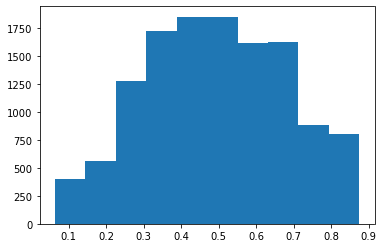

In [146]:
# PLot distribution (should be somewhat normal)
fig,ax = plt.subplots()
ax.hist(FINAL_df['win%'])
plt.show

In [147]:
# filtering out 'Cap Hit' and 'Pos.' as they are redudent with Pos_Grp and Cap% which serve as better metrics
FINAL_df = FINAL_df.drop(['Cap Hit', 'Pos.'], axis=1)

In [148]:
# Grouping for total Cap% spent by each team, each year. Not always 100.
ID_df = FINAL_df.groupby(['ID']).sum()
ID_df

,Cap %,win%,avg_age
ID,,,
arz_2019,99.19,45.752,3435.39
arz_2020,98.74,70.000,3738.00
arz_2021,99.43,97.050,4093.50
atl_2019,97.10,53.436,3248.86
atl_2020,98.66,30.000,3208.80
...,...,...,...
ten_2020,98.26,95.632,3727.98
ten_2021,96.69,116.490,4455.00
was_2019,93.34,24.252,3356.58


In [149]:
new_merged_df = pd.merge(FINAL_df, ID_df, on = 'ID', how= 'outer')
new_merged_df

,Status,Cap %_x,ID,win%_x,signed,avg_age_x,team_x,year_y,POS_GRP,WIN%_GRP,Cap %_y,win%_y,avg_age_y
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,86.39,26.752,3872.96
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,86.39,26.752,3872.96
2,Active Roster:,5.81,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%,86.39,26.752,3872.96
3,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,86.39,26.752,3872.96
4,Active Roster:,3.20,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%,86.39,26.752,3872.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%,101.22,101.500,3112.28
12574,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,101.22,101.500,3112.28
12575,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%,101.22,101.500,3112.28
12576,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,101.22,101.500,3112.28


In [150]:
# Creating new ID to grp by team/year/Pos_GRP
FINAL_df['ID2'] = FINAL_df['ID'].astype(str) + '_' + FINAL_df['POS_GRP'].astype(str)

In [151]:
# Verify
FINAL_df

,Status,Cap %,ID,win%,signed,avg_age,team_x,year_y,POS_GRP,WIN%_GRP,ID2
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
2,Active Roster:,5.81,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%,jax_2021_linebacker
3,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line
4,Active Roster:,3.20,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%,jax_2021_passer
...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%,blt_2019_receiver
12574,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker
12575,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%,blt_2019_kicking
12576,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker


In [152]:
team_year_grp_df = FINAL_df.groupby(['ID2']).sum()

In [153]:
# Could be useful for extra analysis. ROI? Average age for position grp?
team_year_grp_df

,Cap %,win%,avg_age
ID2,,,
arz_2019_d-back,15.84,8.600,645.75
arz_2019_d-line,8.05,6.536,490.77
arz_2019_kicking,1.93,1.376,103.32
arz_2019_linebacker,18.24,7.224,542.43
arz_2019_o-line,20.56,7.912,594.09
...,...,...,...
was_2021_linebacker,5.70,7.416,462.24
was_2021_o-line,23.25,11.536,719.04
was_2021_passer,12.94,3.708,231.12


In [154]:
# Bring in new totals
FINAL_df = pd.merge(FINAL_df, team_year_grp_df, on = 'ID2', how= 'outer')

In [155]:
# Verify
FINAL_df

,Status,Cap %_x,ID,win%_x,signed,avg_age_x,team_x,year_y,POS_GRP,WIN%_GRP,ID2,Cap %_y,win%_y,avg_age_y
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,5.98,17.500,536.60
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32


In [156]:
# Rename Columns for clarity
FINAL_df = FINAL_df.rename(columns={"Cap %_x": "cap_player", "win%_x": "win_player",
                                "avg_age_x": "avg_age_player", "Cap %_y": "total_team_cap",
                                "win%_y": "win%_ID2", "Cap %_y": "Cap%_ID2",
                                })

In [212]:
# Verify
FINAL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 12577
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          12578 non-null  object 
 1   cap_player      12578 non-null  float64
 2   ID              12578 non-null  object 
 3   win_player      12578 non-null  float64
 4   signed          12578 non-null  object 
 5   avg_age_player  12578 non-null  float64
 6   team_x          12578 non-null  object 
 7   year_y          12578 non-null  object 
 8   POS_GRP         12578 non-null  object 
 9   WIN%_GRP        12578 non-null  object 
 10  ID2             12578 non-null  object 
 11  Cap%_ID2        12578 non-null  float64
 12  win%_ID2        12578 non-null  float64
 13  avg_age_y       12578 non-null  float64
 14  ID3             12578 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.5+ MB


In [213]:
# ID Based on year and POS_GRP for analysis
FINAL_df['ID3'] = FINAL_df['year_y'].astype(str) + '_' + FINAL_df['POS_GRP'].astype(str)

In [214]:
# Verify
FINAL_df

,Status,cap_player,ID,win_player,signed,avg_age_player,team_x,year_y,POS_GRP,WIN%_GRP,ID2,Cap%_ID2,win%_ID2,avg_age_y,ID3
0,Active Roster:,7.18,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line
1,Active Roster:,6.58,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line
2,Active Roster:,4.08,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line
3,Active Roster:,1.02,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line
4,Active Roster:,0.66,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,24.75,3.696,535.08,2021_o-line
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,Dead:,0.00,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,5.98,17.500,536.60,2019_linebacker
12574,Active Roster:,1.15,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32,2019_passer
12575,Active Roster:,0.80,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32,2019_passer
12576,Active Roster:,0.29,blt_2019,0.875,53,26.83,blt,2019,passer,high_win%,blt_2019_passer,10.76,3.500,107.32,2019_passer


In [215]:
# Groupby to get mathematical based averages for spending by positions group
ID2_df = FINAL_df.groupby(['POS_GRP'])['Cap%_ID2'].describe()

In [216]:
ID2_df

,count,mean,std,min,25%,50%,75%,max
POS_GRP,,,,,,,,
d-back,2414.0,16.735220,5.293658,6.65,13.26,16.06,18.980,35.97
d-line,1890.0,15.497794,4.787601,6.22,11.41,15.57,19.130,26.28
kicking,613.0,2.756966,1.013421,0.78,1.95,2.77,3.470,5.26
linebacker,1552.0,12.253421,5.843413,2.22,7.88,11.05,15.675,28.59
o-line,2061.0,17.704124,3.788141,9.36,15.32,17.34,19.850,26.67
passer,541.0,10.622994,5.029564,1.49,6.18,10.76,14.390,24.70
receiver,2485.0,15.693312,3.941878,8.19,12.47,15.07,18.320,25.62
runner,1022.0,4.899961,1.940743,1.60,3.34,4.63,6.200,9.65


In [217]:
# Creates tuples with (total cap% spent on POS_GRP, POS_GRP)
subset = FINAL_df[['Cap%_ID2', 'POS_GRP']]
tuples = [tuple(x) for x in subset.to_numpy()]
tuples

[(24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (24.750000000000004, 'o-line'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000000000003, 'linebacker'),
 (16.540000

In [218]:
ID2_df

,count,mean,std,min,25%,50%,75%,max
POS_GRP,,,,,,,,
d-back,2414.0,16.735220,5.293658,6.65,13.26,16.06,18.980,35.97
d-line,1890.0,15.497794,4.787601,6.22,11.41,15.57,19.130,26.28
kicking,613.0,2.756966,1.013421,0.78,1.95,2.77,3.470,5.26
linebacker,1552.0,12.253421,5.843413,2.22,7.88,11.05,15.675,28.59
o-line,2061.0,17.704124,3.788141,9.36,15.32,17.34,19.850,26.67
passer,541.0,10.622994,5.029564,1.49,6.18,10.76,14.390,24.70
receiver,2485.0,15.693312,3.941878,8.19,12.47,15.07,18.320,25.62
runner,1022.0,4.899961,1.940743,1.60,3.34,4.63,6.200,9.65


In [219]:
# Create list to store cpending designation per position group when compared to the rest of the year.
spending_list = []

# Binning POS_GRP_SPENDING based on metrics above.
# low_win% = 0.00 - 25th%
# avg_win% = 26th% - 75th%
# high_win% = 76th% - 100th%

for cap, pos_grp in tuples:
    if pos_grp == 'd-back':
        if cap <= 13.26:
            spending_list.append('low_spend')
        elif cap <= 18.98:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'd-line':
        if cap <= 11.41:
            spending_list.append('low_spend')
        elif cap <= 19.13:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'kicking':
        if cap <= 1.95:
            spending_list.append('low_spend')
        elif cap <= 3.47:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'linebacker':
        if cap <= 7.88:
            spending_list.append('low_spend')
        elif cap <= 15.675:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'o-line':
        if cap <= 15.32:
            spending_list.append('low_spend')
        elif cap <= 19.85:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'passer':
        if cap <= 6.18:
            spending_list.append('low_spend')
        elif cap <= 14.39:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    elif pos_grp == 'receiver':
        if cap <= 12.47:
            spending_list.append('low_spend')
        elif cap <= 18.32:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue
    else:
        if cap <= 3.34:
            spending_list.append('low_spend')
        elif cap <= 6.2:
            spending_list.append('med_spend')
        elif cap <= 100:
            spending_list.append('high_spend')
        else:
            continue

In [221]:
# make sure list is 12578
print(len(spending_list) == 12578)
FINAL_df['pos_grp_spending'] = spending_list

True


In [223]:
FINAL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12578 entries, 0 to 12577
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Status            12578 non-null  object 
 1   cap_player        12578 non-null  float64
 2   ID                12578 non-null  object 
 3   win_player        12578 non-null  float64
 4   signed            12578 non-null  object 
 5   avg_age_player    12578 non-null  float64
 6   team_x            12578 non-null  object 
 7   year_y            12578 non-null  object 
 8   POS_GRP           12578 non-null  object 
 9   WIN%_GRP          12578 non-null  object 
 10  ID2               12578 non-null  object 
 11  Cap%_ID2          12578 non-null  float64
 12  win%_ID2          12578 non-null  float64
 13  avg_age_y         12578 non-null  float64
 14  ID3               12578 non-null  object 
 15  pos_grp_spending  12578 non-null  object 
dtypes: float64(6), object(10)
memory usage: 

In [267]:
# Save to csv
FINAL_df.to_csv('data/FINAL_df2.csv')

In [278]:
# Filtering for 
model_df = FINAL_df[['Status', 'POS_GRP', 'pos_grp_spending', 'WIN%_GRP', 'avg_age_player']]

le = LabelEncoder()
#model_df['WIN%_GRP'] = le.fit_transform(model_df['WIN%_GRP'])

model_df = pd.get_dummies(model_df, columns=['Status', 'POS_GRP', 'pos_grp_spending','WIN%_GRP'])
# (sparse=false?)

# OneHotEncoder(handle_unknown='ignore')?
#model_df['WIN%_GRP'] = ohe.fit_transform(model_df[['WIN%_GRP']])

model_df

,avg_age_player,Status_Active Roster:,Status_Dead:,Status_Exempt:,Status_Injured Reserve:,Status_Left:,Status_NFI:,Status_Practice Squad:,Status_Reserve/PUP:,Status_Suspended:,...,POS_GRP_o-line,POS_GRP_passer,POS_GRP_receiver,POS_GRP_runner,pos_grp_spending_high_spend,pos_grp_spending_low_spend,pos_grp_spending_med_spend,WIN%_GRP_avg_win%,WIN%_GRP_high_win%,WIN%_GRP_low_win%
0,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
4,25.48,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12573,26.83,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
12574,26.83,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12575,26.83,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
12576,26.83,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [225]:
# Save to csv
model_df.to_csv('data/FINAL_df.csv')

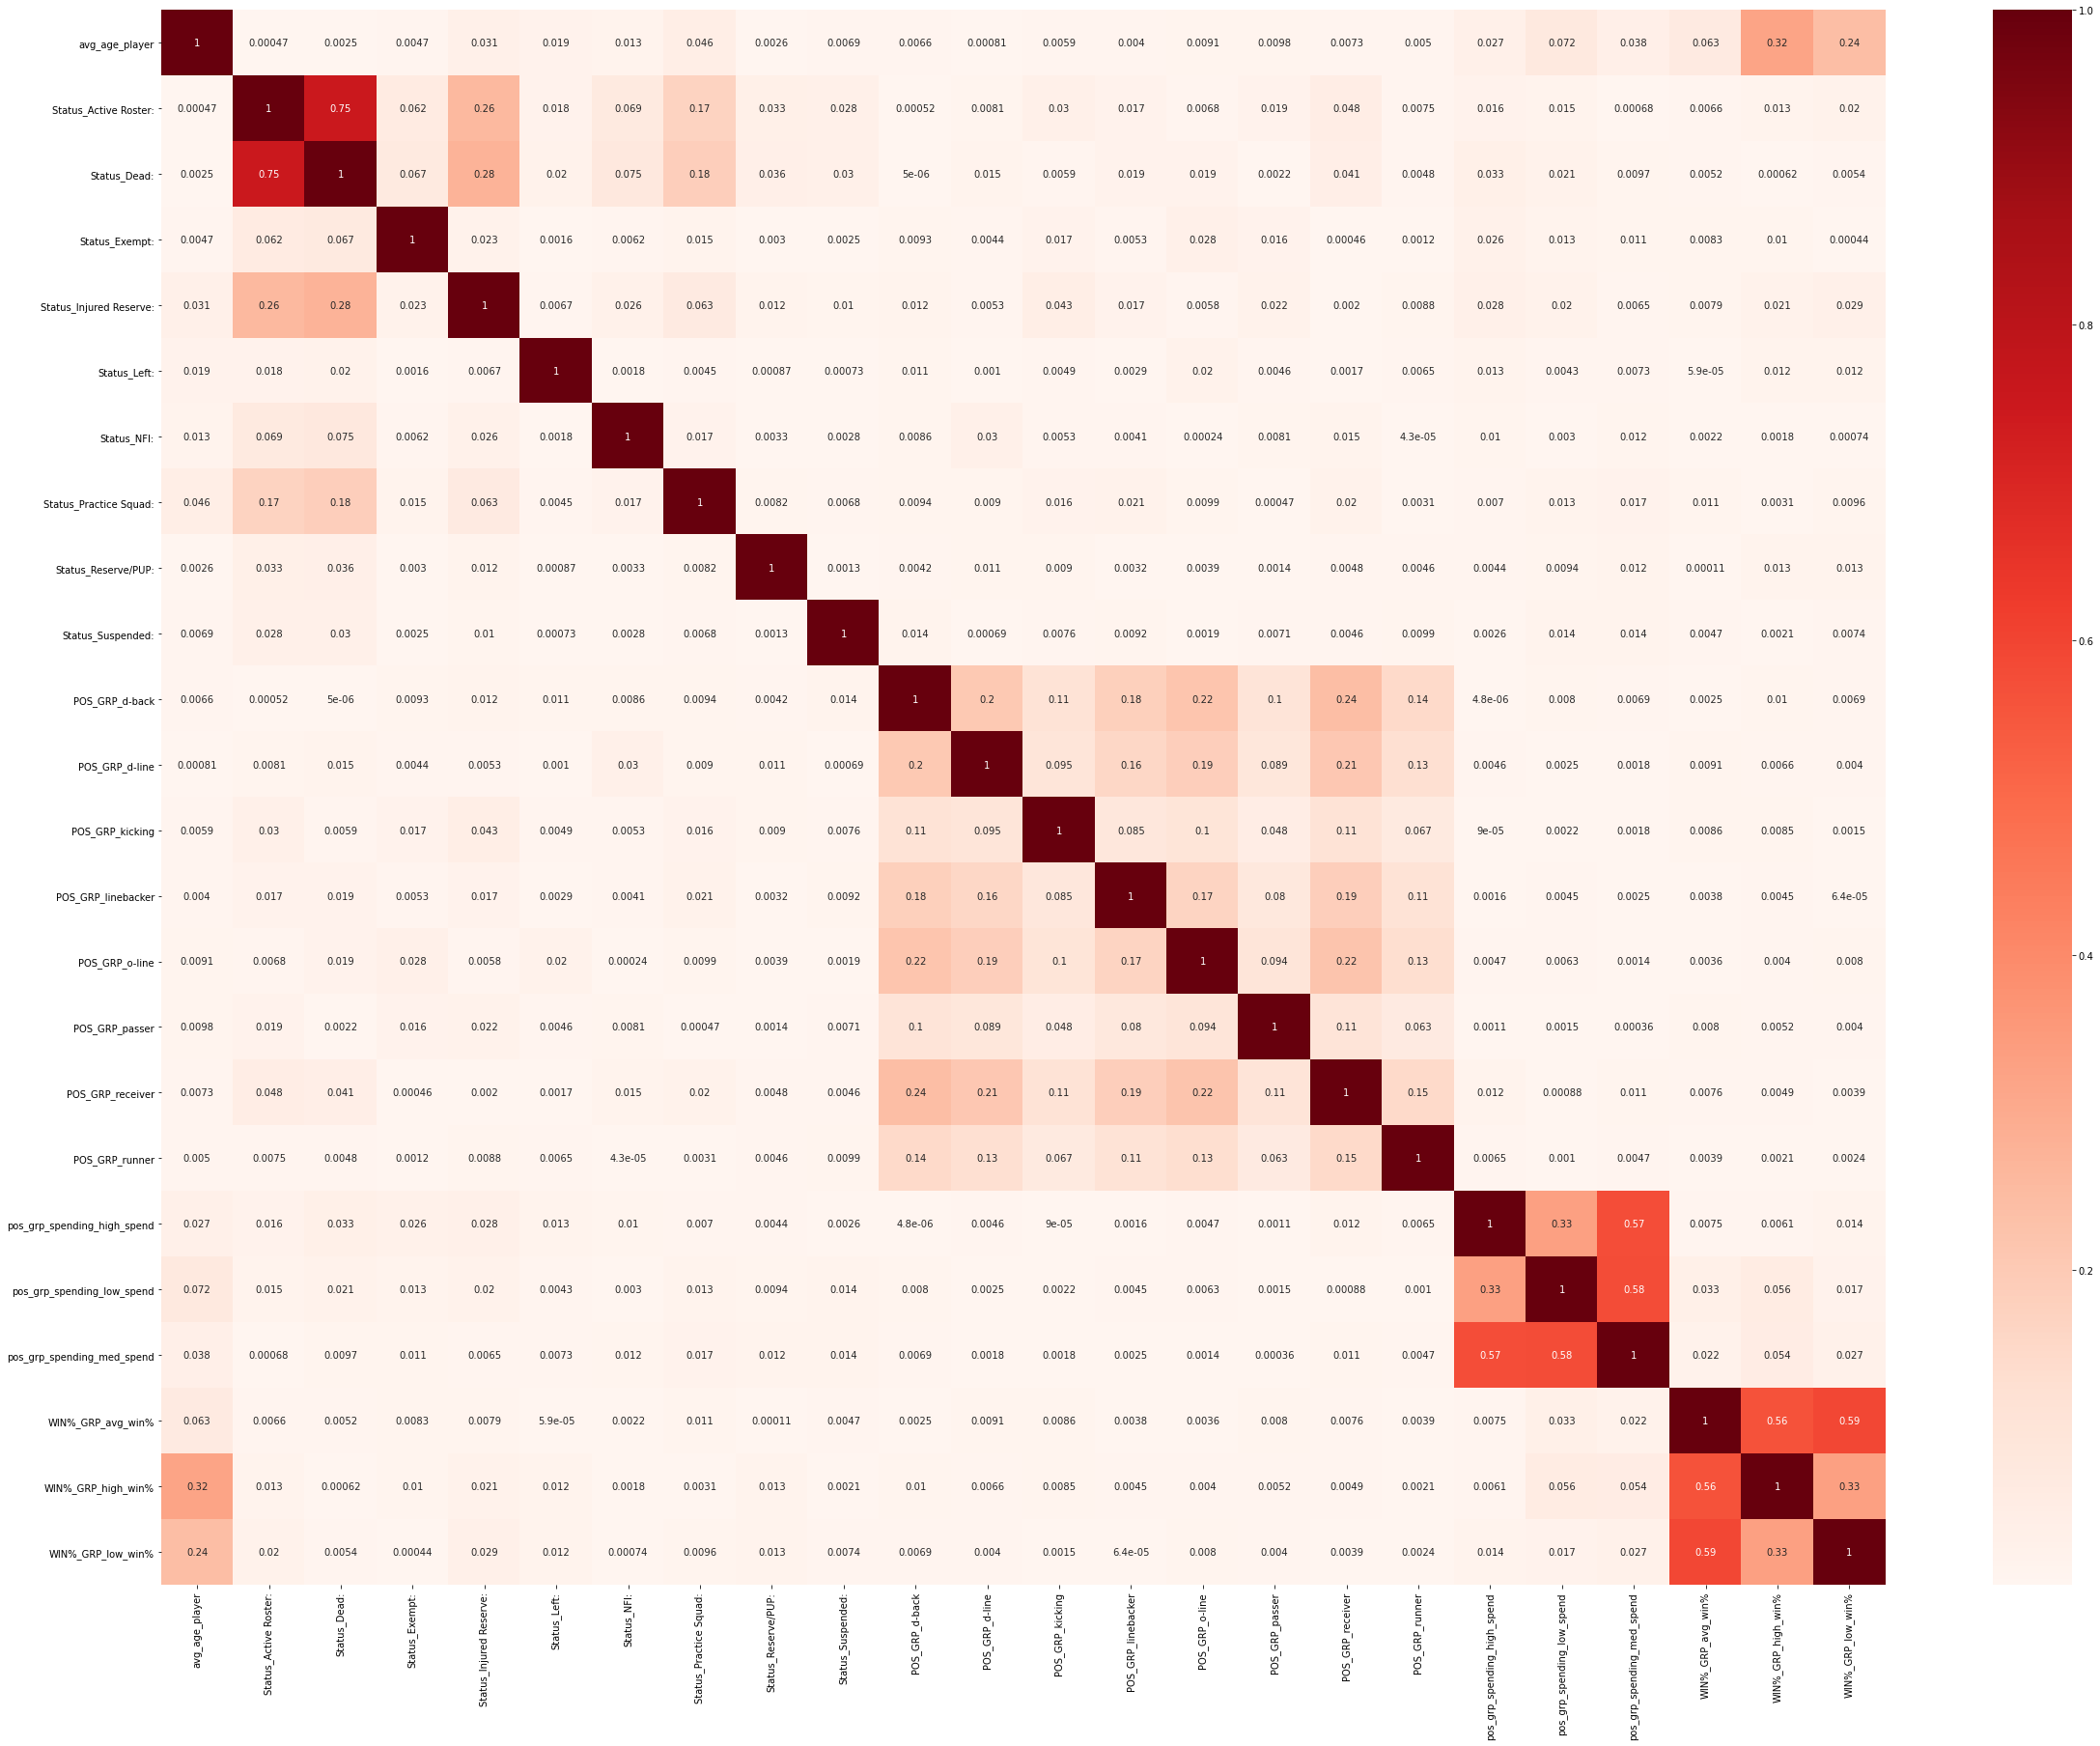

In [226]:
# Heatmap to display correlations in data
corr = model_df.corr().abs()
fig, ax=plt.subplots(figsize=(40,30))
sns.heatmap(corr, cmap='Reds', annot=True);

In [324]:
# model
x = model_df.drop(columns=['WIN%_GRP_high_win%', 'WIN%_GRP_avg_win%', 'WIN%_GRP_low_win%'], axis=1)
y = model_df[['WIN%_GRP_high_win%']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

# Scale data
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

Train 0.6304463055231634
Test 0.6324324324324324


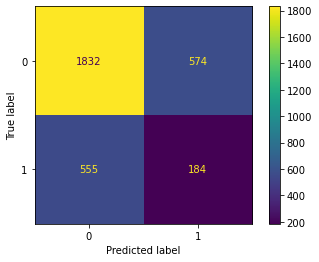

In [325]:
# Instantiated, fit, and ran dummy model
dummy_model = DummyClassifier(strategy="stratified")
dummy_model.fit(x_train_scaled, y_train)
y_hat_train = dummy_model.predict(x_train_scaled)
y_hat_test = dummy_model.predict(x_test_scaled)
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for dummy model
plot_confusion_matrix(dummy_model, x_test_scaled, y_test)

Train 0.8225378988656843
Test 0.8308426073131956


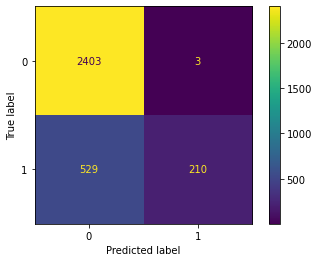

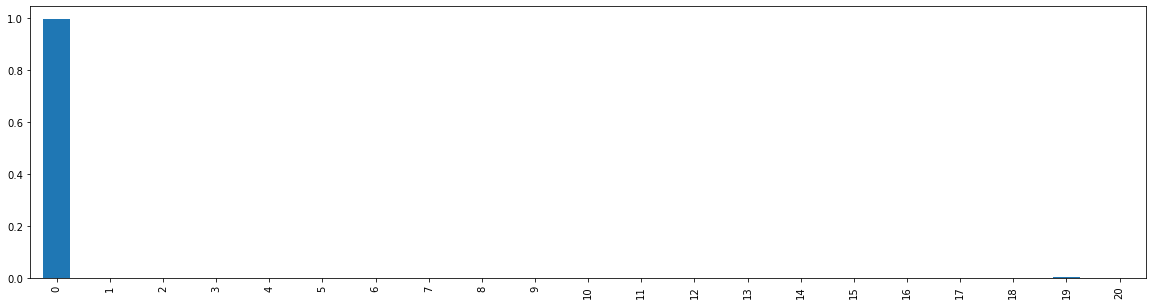

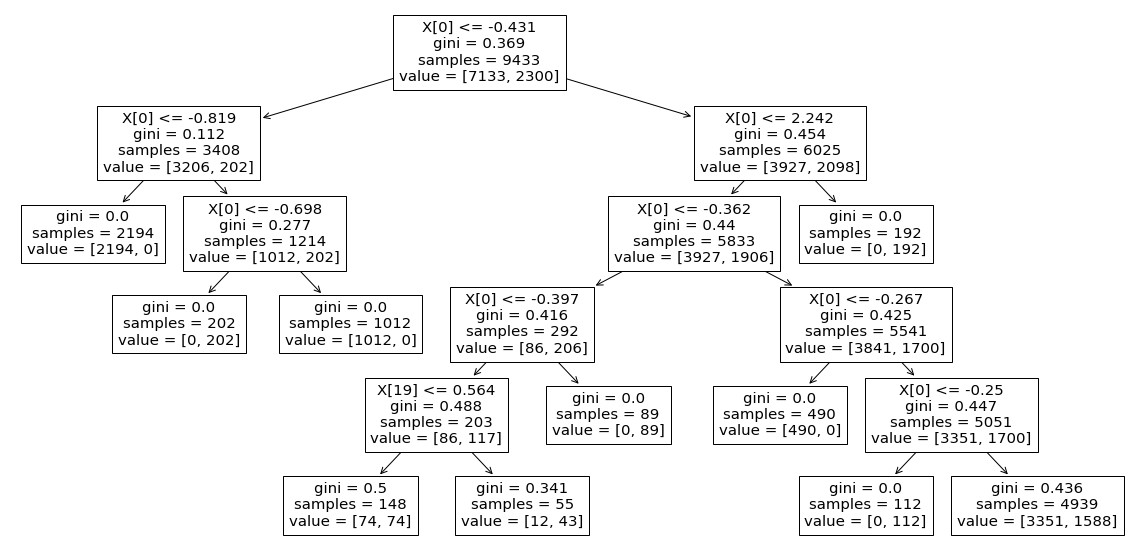

In [326]:
# Instantiated, fit, and ran basic decision tree model
clf = DecisionTreeClassifier(max_depth = 5) 
clf.fit(x_train_scaled, y_train)
y_hat_train = clf.predict(x_train_scaled)
y_hat_test = clf.predict(x_test_scaled)
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for basic decision tree model
plot_confusion_matrix(clf, x_test_scaled, y_test);

# Plotted feature importance for basic decision tree model
ranking = clf.feature_importances_
fig, ax = plt.subplots(figsize=(20,5))
pd.Series(ranking).plot.bar(ax=ax);

# Plotted basic decision tree model
f, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf);

Train 0.7591434326301283
Test 0.7659777424483307


C:\Users\helme\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


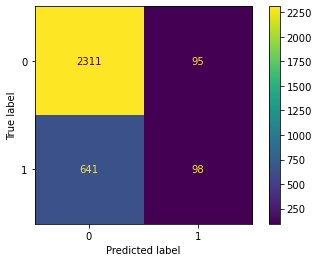

In [327]:
# Lets try a logistic regression model
lr = LogisticRegression(random_state=15)
lr.fit(x_train_scaled, y_train)
y_hat_train = lr.predict(x_train_scaled) 
y_hat_test = lr.predict(x_test_scaled) 
print(f'Train {accuracy_score(y_train, y_hat_train)}')
print(f'Test {accuracy_score(y_test, y_hat_test)}')

# Plotted confusion matrix and ROC AUC for dummy model
plot_confusion_matrix(lr, x_test_scaled, y_test)

# To dos

* Remove code
* clean code
* add markdown
* clean variable names
ask about whether to test for high win or all three?
ask about binning of pos groups
pick slides
make interesting
animated position groups?
detailed explanations for those nonfamiliar

gear search toward active players only?
    This would better support the narative for a new franchise as they wouldn't have dead cap or injuries
    Maybe Keep practice designation?

Is writing to the reader more inviting or should I write strictly 1st person?
Keep as  "non-performance related factors"

Write functions performed in excel, in Python
    Win% df
    name concats for scrapes

finish methodology section in intro by correlation to flow of notebook

Make pretty graphs
    Tableau?
    
Show more data exploration in notebook?

"team_master_list" create more elegantly
add reasoning to filtered_df

Use OHE instead of get dummies

Convert "signed" to int and use in model?

Optimize models

Draw meaningful, actionable conclusions


In [255]:
# Function that takes in the classifier as input and returns a pipeline.
def pipe_maker(classifier):
    
    pipe = Pipeline([('scl', StandardScaler()),
                      ('clf', classifier(random_state=15))])
    return pipe

In [256]:
# Function that takes in a Pipeline & Parameters then returns a gridsearch object with selected parameters.
def gridsearch_maker(pipeline, params):

    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='balanced_accuracy',
                        cv=10,
                        n_jobs=-1)

In [260]:
# Function that takes in a gridsearch, interates over the available hyperparameters and returns the parameters necessary
# to achieve the optimal accuracy score.
def best_accuracy(gridsearch):

    # Create best_accuracy object.
    best_accuracy = 0.0
    
    # Fit gridsearch to regularized data set.
    gridsearch.fit(x_train, y_train)
    
    # Print best parameters.
    print('Best paramaters are: %s' % gridsearch.best_params_)
    
    # Print best train accuracy score.
    print('Best training accuracy is: %.3f' % gridsearch.best_score_)
    
    # Prediction on test data.
    y_pred = gridsearch.predict(x_test)
    
    # Print test data accuracy with best params.
    print('Test set accuracy score with best parameters: %.3f ' % accuracy_score(y_test, y_pred))
    
    # Print confusion matrix and classification report.
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score: ', accuracy_score(y_test, y_pred))
    
    # Plot confusion matrix.
    plot_confusion_matrix(gridsearch, x_test, y_test,cmap="plasma")
    plt.show()

In [262]:
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_small = [1.0, 0.5, 0.1]

Best paramaters are: {'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy is: 0.542
Test set accuracy score with best parameters: 0.766 
[[2311   95]
 [ 641   98]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2406
           1       0.51      0.13      0.21       739

    accuracy                           0.77      3145
   macro avg       0.65      0.55      0.54      3145
weighted avg       0.72      0.77      0.71      3145

accuracy score:  0.7659777424483307


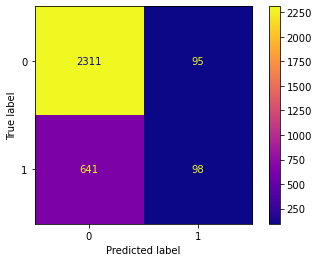

In [261]:
pipe_lr = pipe_maker(LogisticRegression)

gs_lr = gridsearch_maker(pipe_lr, {'clf__penalty': ['l1', 'l2'], 'clf__solver': ['liblinear', 'saga']})

best_accuracy(gs_lr)

Best paramaters are: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3}
Best training accuracy is: 0.670
Test set accuracy score with best parameters: 0.839 
[[2399    7]
 [ 498  241]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      2406
           1       0.97      0.33      0.49       739

    accuracy                           0.84      3145
   macro avg       0.90      0.66      0.70      3145
weighted avg       0.86      0.84      0.81      3145

accuracy score:  0.8394276629570747


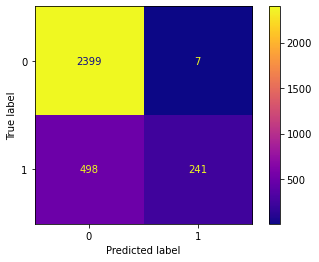

In [266]:
# fitting Random Forest pipeline
pipe_rf = pipe_maker(RandomForestClassifier)

# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

best_accuracy(gs_rf)

In [271]:
ID_list = [win_percent_df['ID']]

In [272]:
type(ID_list)

list

In [283]:
win_percent_df

,rank,team,win%,signed,avg_age,active,dead,total_cap,cap_space(all),year,ID
0,1,jax,0.176,58,25.48,"$126,905,443","$23,625,065","$180,473,269","$28,496,887",2021.0,jax_2021
1,2,lac,0.529,52,26.50,"$144,105,845","$6,073,247","$167,237,647","$24,492,880",2021.0,lac_2021
2,3,phi,0.529,62,25.32,"$101,610,988","$63,769,525","$189,181,452","$17,817,323",2021.0,phi_2021
3,4,den,0.412,55,25.78,"$107,269,390","$37,144,693","$188,343,846","$12,465,470",2021.0,den_2021
4,5,sea,0.412,57,26.35,"$137,955,994","$13,921,645","$172,703,125","$11,228,110",2021.0,sea_2021
...,...,...,...,...,...,...,...,...,...,...,...
91,28,arz,0.344,53,25.83,"$118,348,287","$50,898,166","$192,019,927","$1,585,204",2019.0,arz_2019
92,29,nyg,0.250,53,25.66,"$125,098,384","$55,156,416","$194,612,924","$1,492,067",2019.0,nyg_2019
93,30,min,0.625,51,26.10,"$177,166,406","$8,379,795","$191,016,955","$805,215",2019.0,min_2019
94,31,pit,0.500,53,25.68,"$129,754,417","$34,440,395","$206,404,929","$493,991",2019.0,pit_2019


In [293]:
team_based_df = model_df.groupby('WIN%_GRP_high_win%').sum()

In [294]:
team_based_df

,avg_age_player,Status_Active Roster:,Status_Dead:,Status_Exempt:,Status_Injured Reserve:,Status_Left:,Status_NFI:,Status_Practice Squad:,Status_Reserve/PUP:,Status_Suspended:,...,POS_GRP_linebacker,POS_GRP_o-line,POS_GRP_passer,POS_GRP_receiver,POS_GRP_runner,pos_grp_spending_high_spend,pos_grp_spending_low_spend,pos_grp_spending_med_spend,WIN%_GRP_avg_win%,WIN%_GRP_low_win%
WIN%_GRP_high_win%,,,,,,,,,,,,,,,,,,,,,
0,248765.44,3883.0,4262.0,49.0,857.0,6.0,66.0,387.0,18.0,11.0,...,1169.0,1555.0,416.0,1874.0,772.0,2381.0,2534.0,4624.0,6272.0,3267.0
1,80572.85,1282.0,1360.0,21.0,232.0,0.0,20.0,119.0,2.0,3.0,...,383.0,506.0,125.0,611.0,250.0,740.0,635.0,1664.0,0.0,0.0


In [295]:
team_based_df = pd.read_csv('data/Team_POSGRP_Year_df.csv')

In [296]:
team_based_df

,Status,ID,win_player,signed,avg_age_player,team_x,year_y,POS_GRP,WIN%_GRP,ID2,...,ID3,pos_grp_spending,o-line_spending,linebacker_spending,passer_spending,d-back_spending,receiver_spending,d-line_spending,runner_spending,kicking_spending
0,Active Roster:,jax_2021,0.176,58,25.48,jax,2021,o-line,low_win%,jax_2021_o-line,...,2021_o-line,high_spend,high_spend,2021,2021,2021,2021,2021,2021,2021
1,Active Roster:,jax_2021,0.176,58,25.48,jax,2021,linebacker,low_win%,jax_2021_linebacker,...,2021_linebacker,high_spend,2021,high_spend,2021,2021,2021,2021,2021,2021
2,Active Roster:,jax_2021,0.176,58,25.48,jax,2021,passer,low_win%,jax_2021_passer,...,2021_passer,low_spend,2021,2021,low_spend,2021,2021,2021,2021,2021
3,Active Roster:,jax_2021,0.176,58,25.48,jax,2021,d-back,low_win%,jax_2021_d-back,...,2021_d-back,low_spend,2021,2021,2021,low_spend,2021,2021,2021,2021
4,Active Roster:,jax_2021,0.176,58,25.48,jax,2021,receiver,low_win%,jax_2021_receiver,...,2021_receiver,low_spend,2021,2021,2021,2021,low_spend,2021,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Active Roster:,blt_2019,0.875,53,26.83,blt,2019,receiver,high_win%,blt_2019_receiver,...,2019_receiver,med_spend,2019,2021,2021,2021,med_spend,2021,2021,2021
764,Active Roster:,blt_2019,0.875,53,26.83,blt,2019,kicking,high_win%,blt_2019_kicking,...,2019_kicking,high_spend,2019,2021,2021,2021,2021,2021,2021,high_spend
765,Active Roster:,blt_2019,0.875,53,26.83,blt,2019,runner,high_win%,blt_2019_runner,...,2019_runner,low_spend,2019,2021,2021,2021,2021,2021,low_spend,2021
766,Active Roster:,blt_2019,0.875,53,26.83,blt,2019,linebacker,high_win%,blt_2019_linebacker,...,2019_linebacker,low_spend,2019,low_spend,2021,2021,2021,2021,2021,2021


In [302]:
team_based_df_1 = team_based_df.groupby('team_x')['POS_GRP'].count()
team_based_df_1

# 8 position groups across 3 years = 24

team_x
arz    24
atl    24
blt    24
buf    24
car    24
chi    24
cin    24
cle    24
dal    24
den    24
det    24
gb     24
hou    24
ind    24
jax    24
kc     24
lac    24
lar    24
lv     24
mia    24
min    24
ne     24
no     24
nyg    24
nyj    24
phi    24
pit    24
sea    24
sf     24
tb     24
ten    24
was    24
Name: POS_GRP, dtype: int64

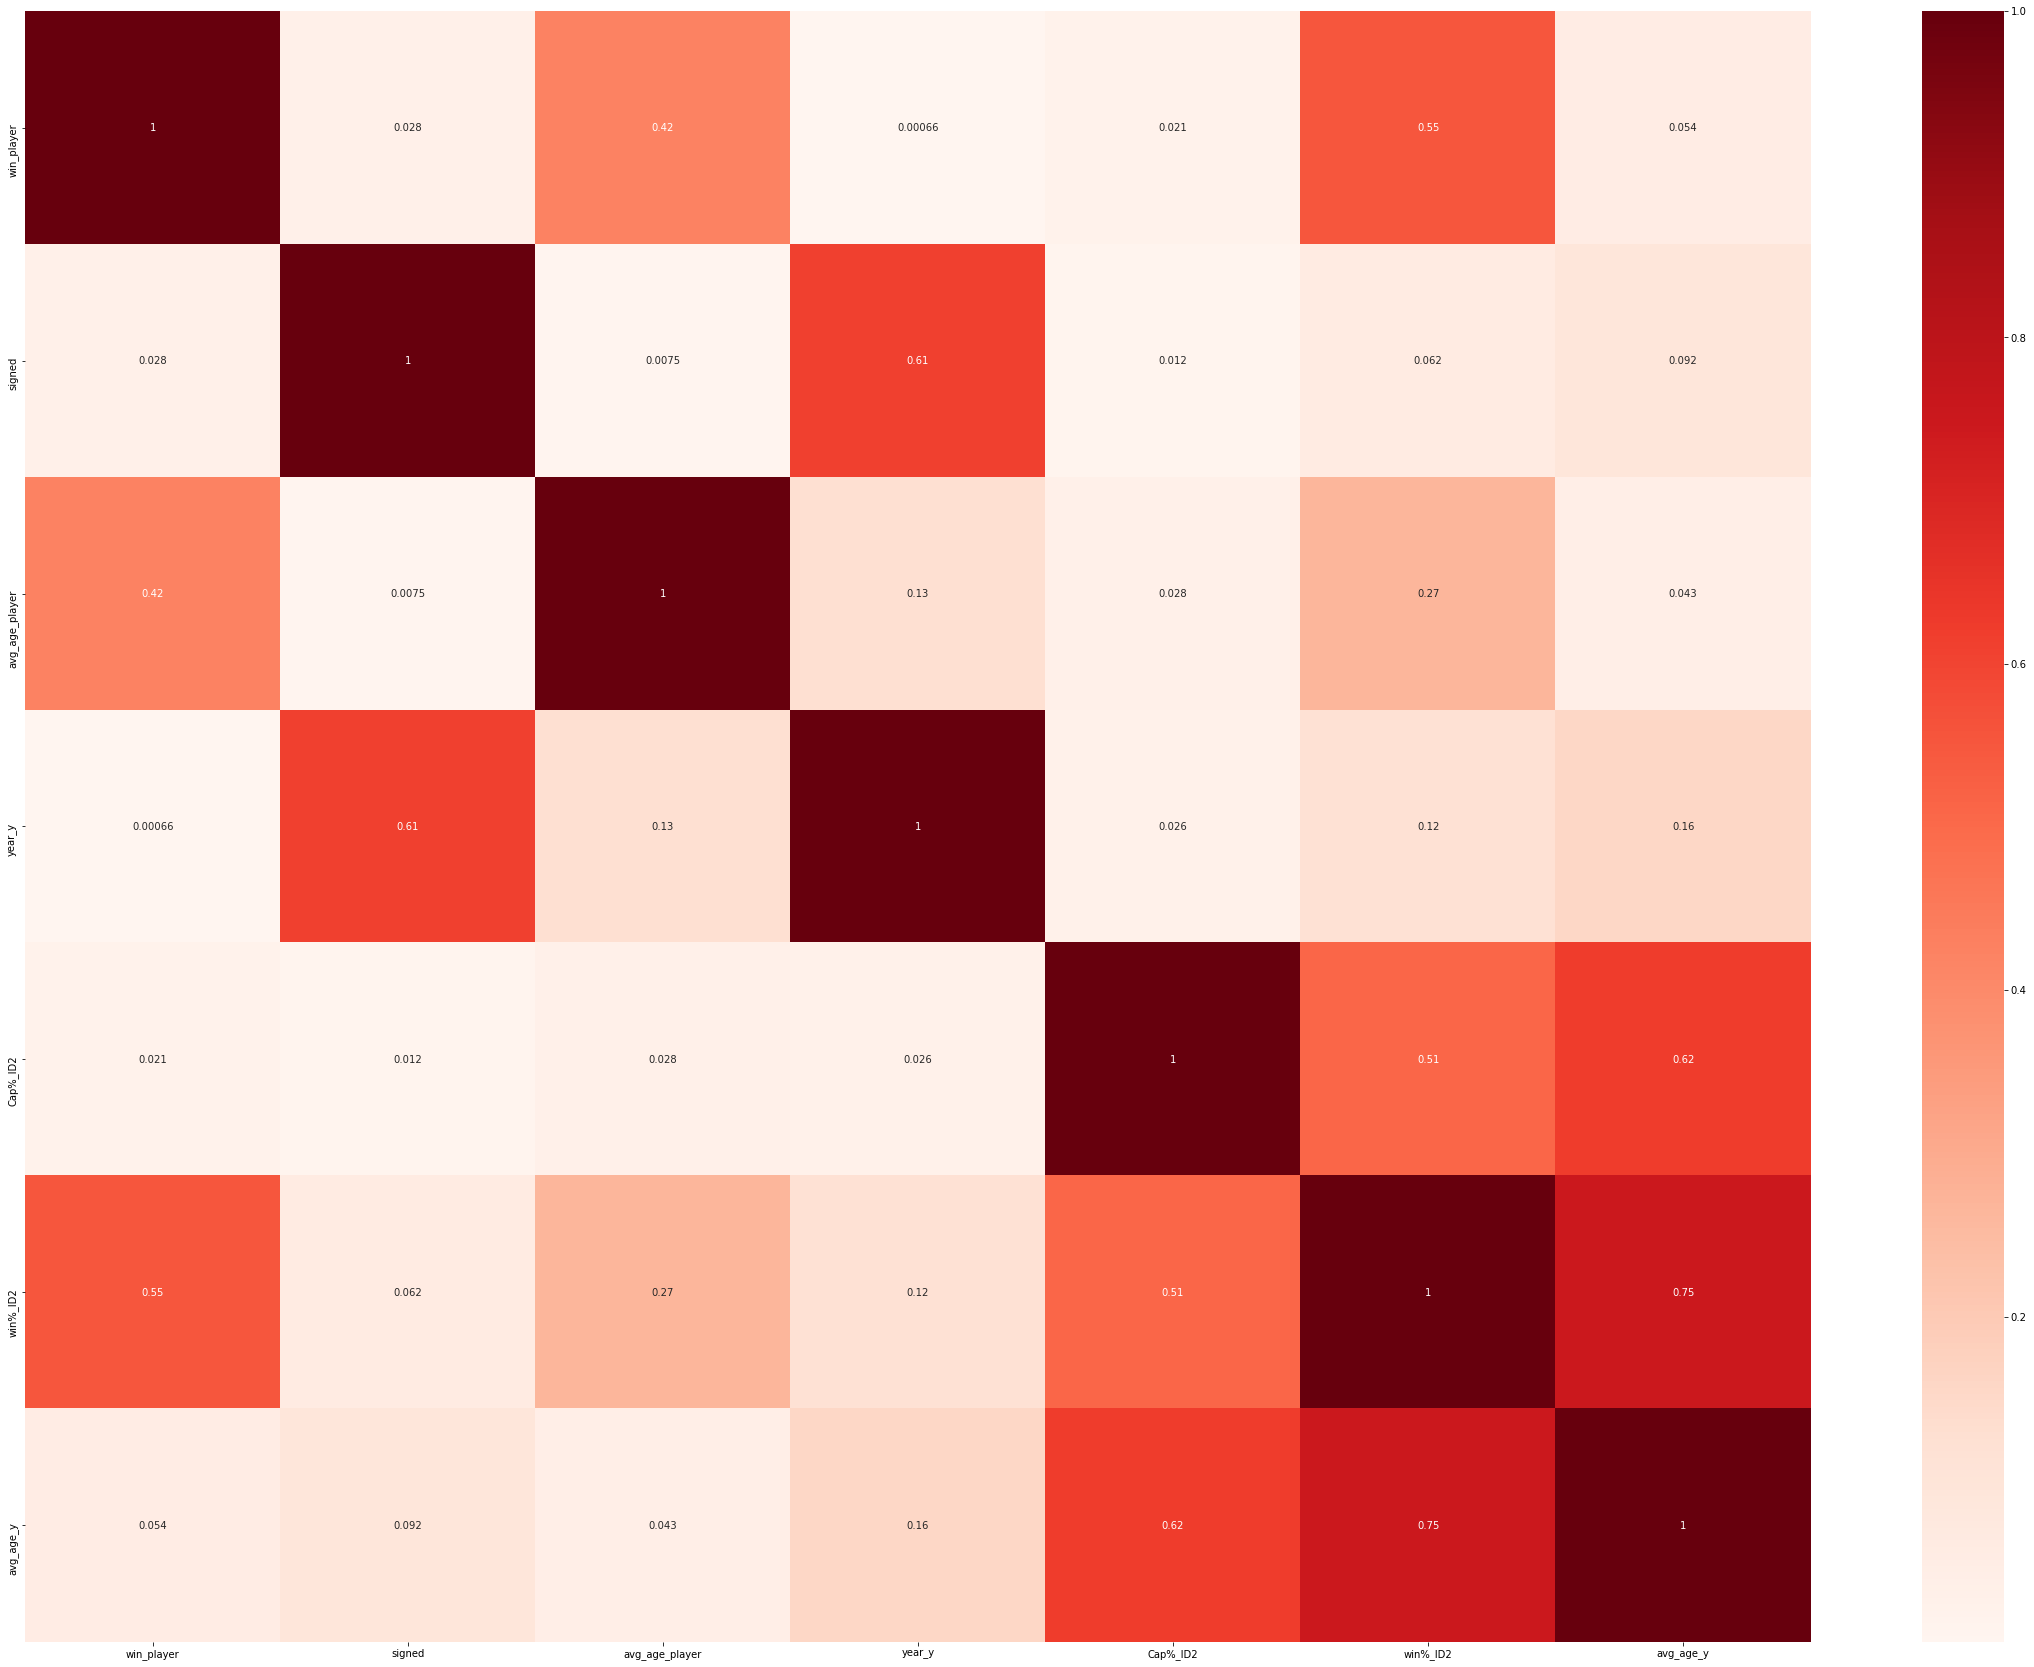

In [303]:
# Heatmap to display correlations in data
corr = team_based_df.corr().abs()
fig, ax=plt.subplots(figsize=(40,30))
sns.heatmap(corr, cmap='Reds', annot=True);

In [304]:
team_based_df = pd.read_csv('data/team_rows_df.csv')

In [305]:
team_based_df

,ID,o-line_spending,linebacker_spending,passer_spending,d-back_spending,receiver_spending,d-line_spending,runner_spending,kicking_spending
0,jax_2021,high_spend,high_spend,low_spend,low_spend,low_spend,low_spend,low_spend,high_spend
1,lac_2021,med_spend,high_spend,low_spend,med_spend,med_spend,low_spend,med_spend,low_spend
2,phi_2021,med_spend,low_spend,high_spend,low_spend,med_spend,high_spend,low_spend,med_spend
3,den_2021,med_spend,high_spend,low_spend,high_spend,low_spend,low_spend,high_spend,med_spend
4,sea_2021,med_spend,med_spend,high_spend,low_spend,low_spend,med_spend,med_spend,high_spend
...,...,...,...,...,...,...,...,...,...
91,arz_2019,high_spend,high_spend,med_spend,med_spend,med_spend,low_spend,high_spend,low_spend
92,nyg_2019,low_spend,high_spend,high_spend,med_spend,high_spend,low_spend,med_spend,low_spend
93,min_2019,low_spend,low_spend,high_spend,high_spend,med_spend,high_spend,low_spend,low_spend
94,pit_2019,med_spend,med_spend,med_spend,med_spend,med_spend,med_spend,low_spend,med_spend


In [313]:
team_based_df_merged = pd.merge(team_based_df, win_percent_df[['ID','win%']], on = 'ID', how= 'outer')

In [314]:
team_based_df_merged

,ID,o-line_spending,linebacker_spending,passer_spending,d-back_spending,receiver_spending,d-line_spending,runner_spending,kicking_spending,win%
0,jax_2021,high_spend,high_spend,low_spend,low_spend,low_spend,low_spend,low_spend,high_spend,0.176
1,lac_2021,med_spend,high_spend,low_spend,med_spend,med_spend,low_spend,med_spend,low_spend,0.529
2,phi_2021,med_spend,low_spend,high_spend,low_spend,med_spend,high_spend,low_spend,med_spend,0.529
3,den_2021,med_spend,high_spend,low_spend,high_spend,low_spend,low_spend,high_spend,med_spend,0.412
4,sea_2021,med_spend,med_spend,high_spend,low_spend,low_spend,med_spend,med_spend,high_spend,0.412
...,...,...,...,...,...,...,...,...,...,...
91,arz_2019,high_spend,high_spend,med_spend,med_spend,med_spend,low_spend,high_spend,low_spend,0.344
92,nyg_2019,low_spend,high_spend,high_spend,med_spend,high_spend,low_spend,med_spend,low_spend,0.250
93,min_2019,low_spend,low_spend,high_spend,high_spend,med_spend,high_spend,low_spend,low_spend,0.625
94,pit_2019,med_spend,med_spend,med_spend,med_spend,med_spend,med_spend,low_spend,med_spend,0.500


In [321]:
new_model_df = pd.get_dummies(team_based_df_merged, columns =['o-line_spending', 'linebacker_spending', 'passer_spending','d-back_spending','receiver_spending', 'd-line_spending', 'runner_spending', 'kicking_spending'])


In [322]:
new_model_df

,ID,win%,o-line_spending_high_spend,o-line_spending_low_spend,o-line_spending_med_spend,linebacker_spending_high_spend,linebacker_spending_low_spend,linebacker_spending_med_spend,passer_spending_high_spend,passer_spending_low_spend,...,receiver_spending_med_spend,d-line_spending_high_spend,d-line_spending_low_spend,d-line_spending_med_spend,runner_spending_high_spend,runner_spending_low_spend,runner_spending_med_spend,kicking_spending_high_spend,kicking_spending_low_spend,kicking_spending_med_spend
0,jax_2021,0.176,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,lac_2021,0.529,0,0,1,1,0,0,0,1,...,1,0,1,0,0,0,1,0,1,0
2,phi_2021,0.529,0,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,0,1
3,den_2021,0.412,0,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,sea_2021,0.412,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,arz_2019,0.344,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
92,nyg_2019,0.250,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
93,min_2019,0.625,0,1,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
94,pit_2019,0.500,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


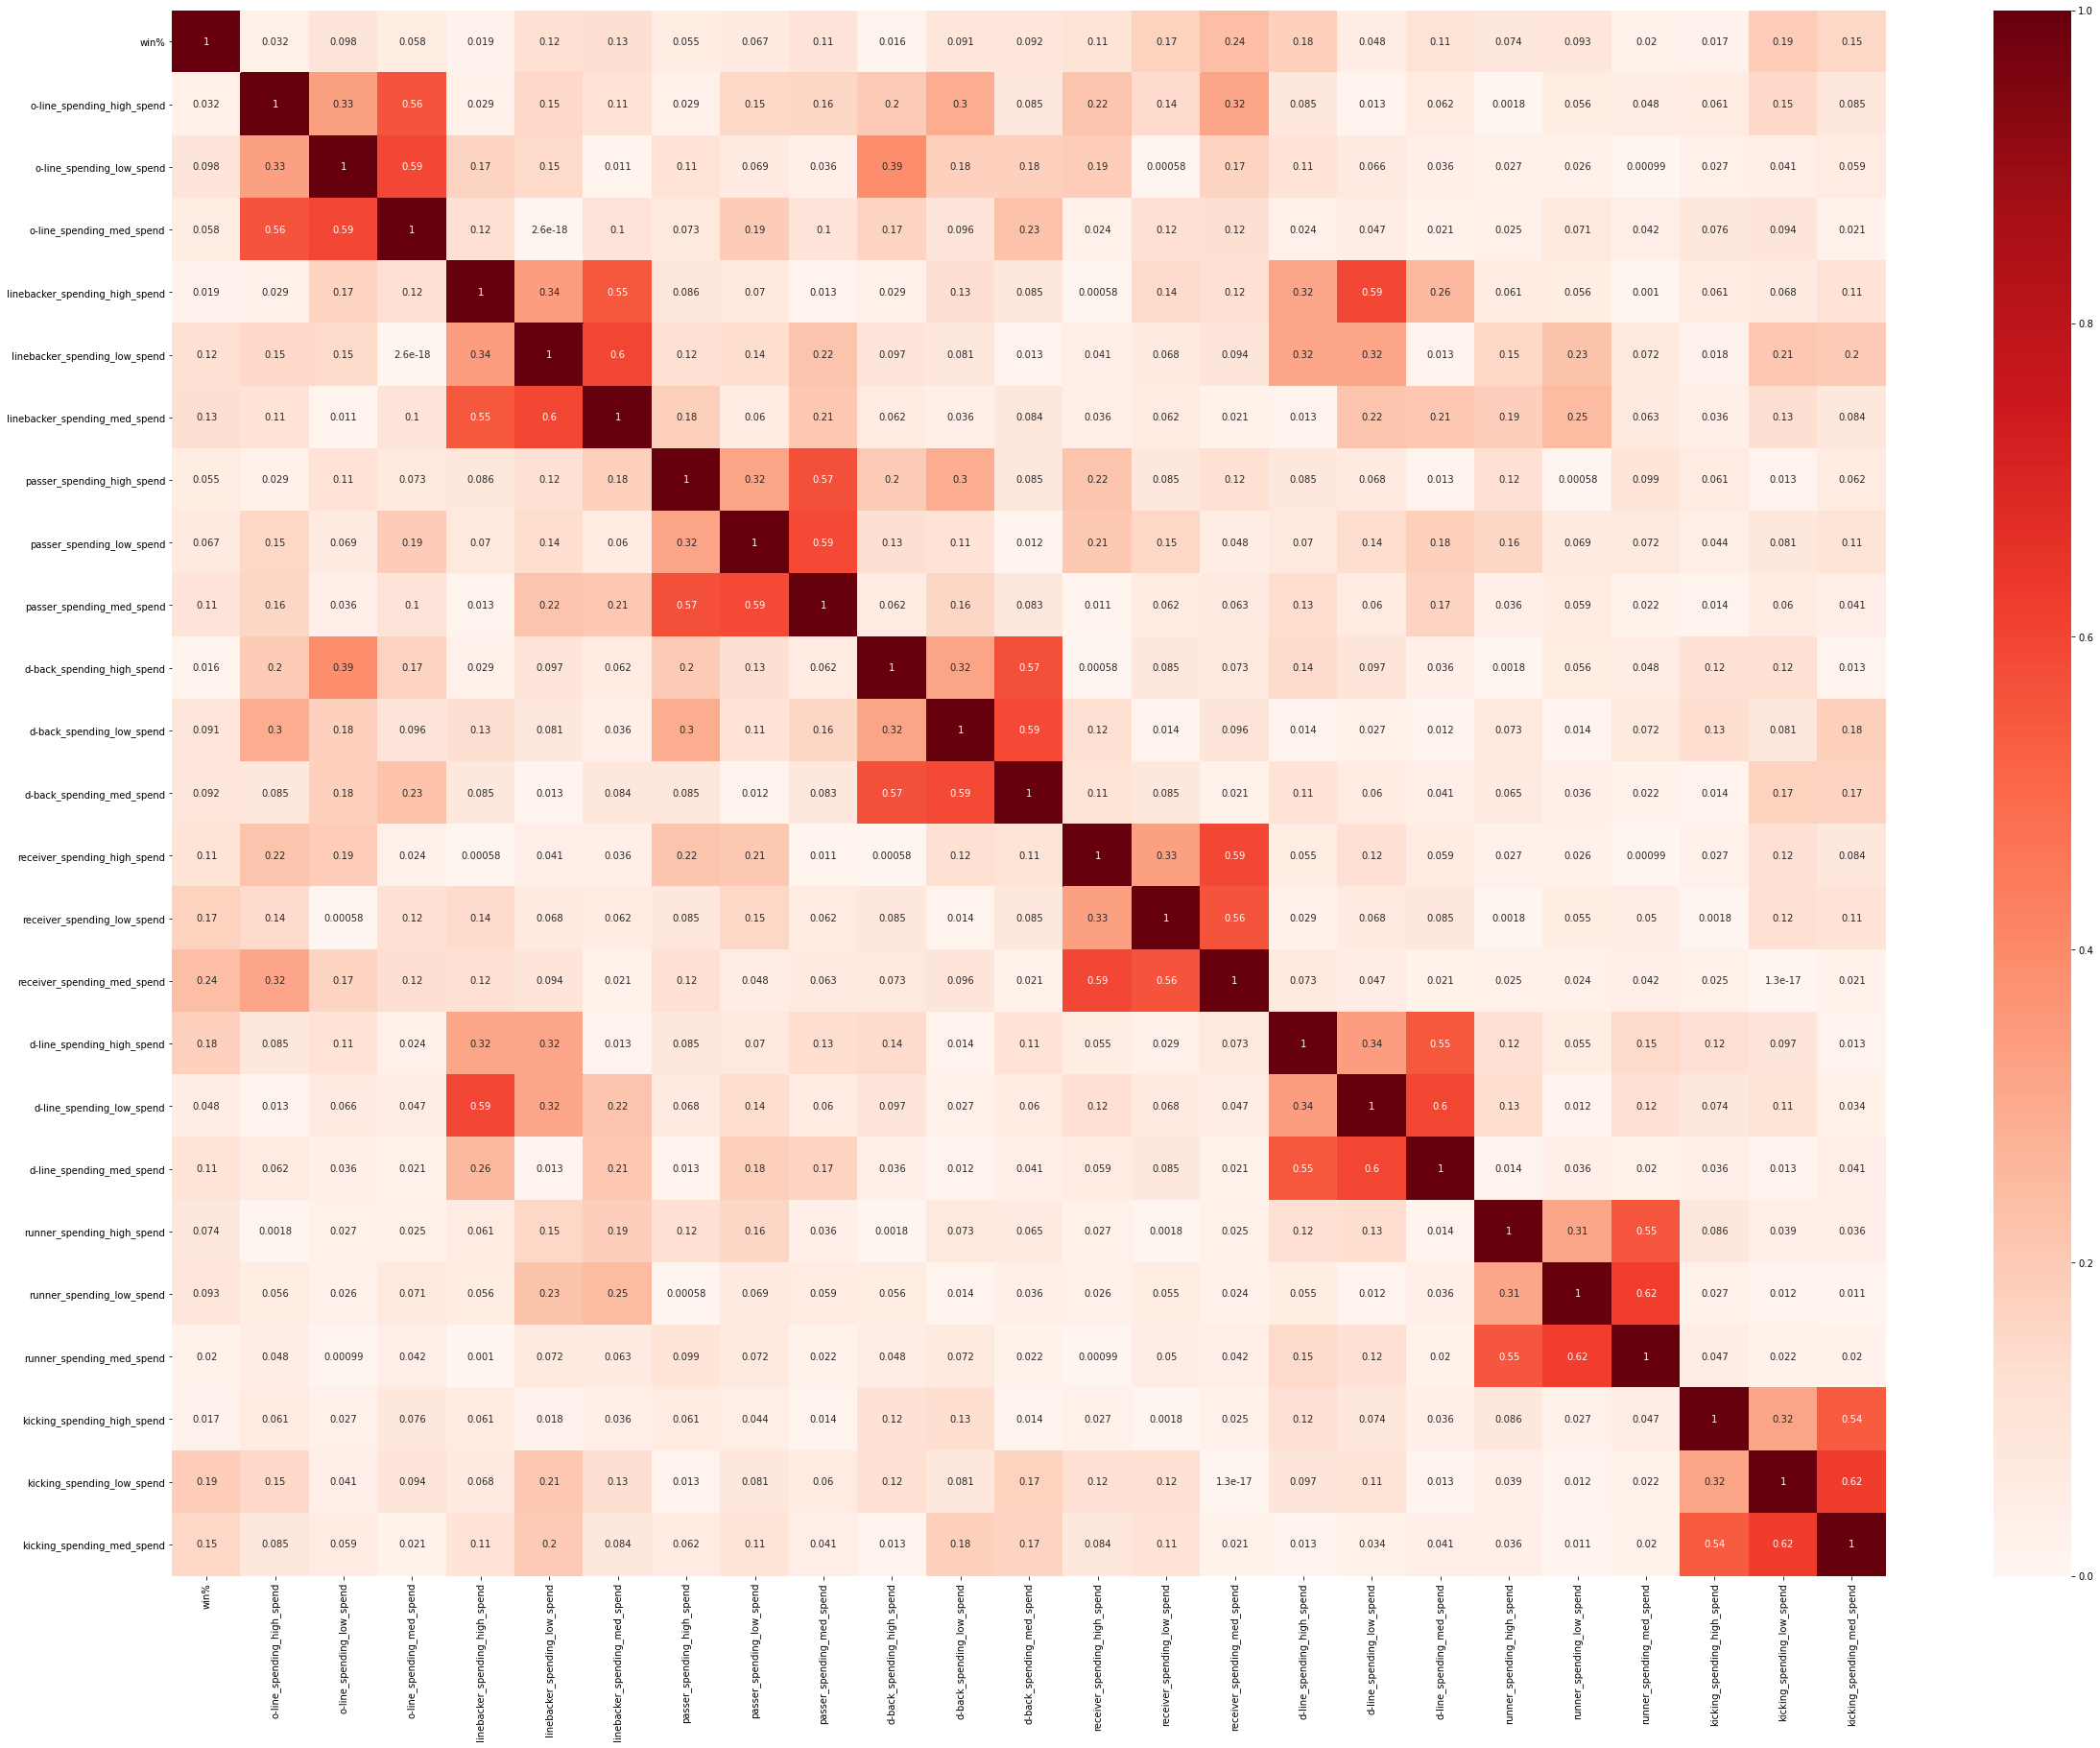

In [323]:
# Heatmap to display correlations in data
corr = new_model_df.corr().abs()
fig, ax=plt.subplots(figsize=(40,30))
sns.heatmap(corr, cmap='Reds', annot=True);